<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 3</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 .Also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$5^{th}$ December, Saturday at 20:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'abania2s'
member2 = 'ilakhz2s'

# Clustering[100 points]

In [2]:
#Headers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sys
import os
from IPython.display import Image
#Include your other headers here
import imageio
from scipy import misc 
from sklearn.cluster import KMeans
import pandas as pd
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture 

# Task 1: Image compression with K-means[50 points]

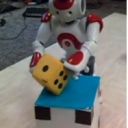

In [3]:
Image(filename='NAORelease.jpg')

### 1. Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg". As a feature vector use RGB-representation of each pixel from the image. Refer slide no-24 from MOGandEM.pdf (4th lecture)[30 points]

1. Initialization: pick K arbitrary centroids (cluster means)
2. Assign each sample to the closest centroid.
3. Adjust the centroids to be the means of the samples assigned to them.
4. Go to step 2 (until no change)

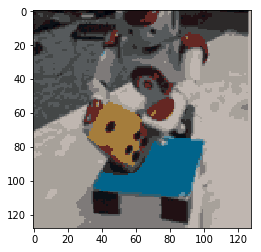

--- running time : 35.46213746070862 seconds ---


In [4]:
#Code here
"""
def sampleClosestCentroid():
    #Function to assign each sample to the closest centroids
    return

def adjustCentroidsMean():
    #Function to adjust the centroids to the mean of the sample assigned
    return

def kMeansClustering():
    #Fucntion to call the above function for certain iterations
    return

def compressImage():
    #Function to compress the image and display
    return
    
if __name__ == '__main__': 
    
    print("Kmeans clustering")
    #Assign parameters
    #read image
    #Sample the initial centroids
    kMeansClustering()
    compressImage()
"""    
def read_image(): 
    image = imageio.imread('NAORelease.jpg')  
    image = image / 255 
    return image 
import time
start_time = time.time()

def initializetion_means(image, clusters): 
    points = np.reshape(image, (image.shape[0] * image.shape[1], 
                                                image.shape[2]))  
    m, n = points.shape 
    means = np.zeros((clusters, n))  
    for i in range(clusters): 
        rand1 = int(np.random.random(1)*m) 
        rand2 = int(np.random.random(1)*m) 
        rand3 = int(np.random.random(1)*m)
        means[i, 0] = points[rand1, 0] 
        means[i, 1] = points[rand2, 1] 
        means[i, 2] = points[rand3, 2]
    return points, means 

def distance(x1, y1,z1, x2, y2,z2): 
      
    dist = np.square(x1 - x2) + np.square(y1 - y2) + np.square(z1 - z2)
    dist = np.sqrt(dist)
    return dist 

def k_means(points, means, clusters): 
    iterations = 10   
    m, n = points.shape
    index = np.zeros(m)  

    while(iterations > 0): 
        for j in range(len(points)):
            minv = 1000
            temp = None
              
            for k in range(clusters): 
                  
                x1 = points[j, 0] 
                y1 = points[j, 1] 
                z1 = points[j, 2]
                x2 = means[k, 0] 
                y2 = means[k, 1] 
                z2 = means[k, 2]
                  
                if(distance(x1, y1,z1, x2, y2, z2) < minv):          
                    minv = distance(x1, y1,z1, x2, y2, z2) 
                    temp = k 
                    index[j] = k  
        for k in range(clusters): 
              
            sumx = 0
            sumy = 0
            sumz = 0
            count = 0
              
            for j in range(len(points)): 
                  
                if(index[j] == k): 
                    sumx += points[j, 0] 
                    sumy += points[j, 1]  
                    sumz += points[j, 2]
                    count += 1 
            if(count == 0): 
                count = 1             
            means[k, 0] = float(sumx / count) 
            means[k, 1] = float(sumy / count) 
            means[k, 2] = float(sumz / count) 
              
        iterations -= 1 
    return means, index 

def plot_image(means, index, img): 
    centroid = np.array(means) 
    recovered = centroid[index.astype(int), :] 
      
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1], img.shape[2])) 
    plt.imshow(recovered) 
    plt.show() 
    
image = read_image() 
clusters = 15
points, means = initializetion_means(image, clusters) 
means, index = k_means(points, means, clusters) 

plot_image(means, index, image) 
print("--- running time : %s seconds ---" % (time.time() - start_time))    

### 2. What are the parameters you played around what is your inference? Hint:- See which are the changeable ones- Hyperparameters[10 points]

**Your explanation here**

### 3. Compare your implementation with the existing k-mean algorithm given in sklearn. e.g running time[10 points]

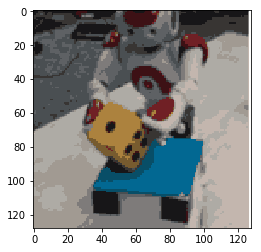

--- running time : 2.7576870918273926 seconds ---


In [5]:
#Code here
img = read_image()

start_time = time.time()
points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2])) 
k_means = KMeans(n_clusters=15).fit(points)
# compute k-means clustering
labels = k_means.labels_
p = pd.DataFrame(points) 
p['labels']= labels

c = np.zeros((15,3))
 
for i in range(15):
    c[i] = np.mean(np.array(p[p['labels']==i]),axis=0)[:3]
labels = k_means.labels_
p = pd.DataFrame(points) 
p['labels']= labels

c = np.zeros((15,3))
 
for i in range(15):
    c[i] = np.mean(np.array(p[p['labels']==i]),axis=0)[:3]
labels = k_means.labels_
p = pd.DataFrame(points) 
p['labels']= labels

c = np.zeros((15,3))
 
for i in range(15):
    c[i] = np.mean(np.array(p[p['labels']==i]),axis=0)[:3]
    
data =  np.array(points[:,:])
labels = labels[np.newaxis].T
res = np.hstack((data,labels))    

for i in range(16384):
    data[i][0:3] = c[int(res[i][3])]
data = np.reshape(data, (img.shape[0], img.shape[1],img.shape[2]))    
plt.imshow(data) 
plt.show()
print("--- running time : %s seconds ---" % (time.time() - start_time))

**Looking to the output it gives better result with sklearn. For the running time sklearn is faster**

# Task 2: Mixture of Gaussian, EM-Algorithm[50 points]

### Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets:



- Follow the technical advises given in the lecture, namely run first k-means for the first 10-100 iterations (if required for the built in function its takes care by itself)
- Check if you need to add regularisation 
- Plot 
    1. Initial distribution - All the points should have same color.
    2. Soft assignment -  Assign the data points to the particular cluster only if their probability is above 0.9 others are to be considered as outliers. So give different color for all the outliers and clusters as shown in the second plot of the image (You should explore the way to do this).
    3. Hard assignment -  Each cluster should have different colors here you won't have outliers since the neighbouring datapoints are assigned to some clusters.
   
- All the clusters should have ellipsoids of three standard deviation. Kindly replicate the scene given in the image.

**Use sklearn**

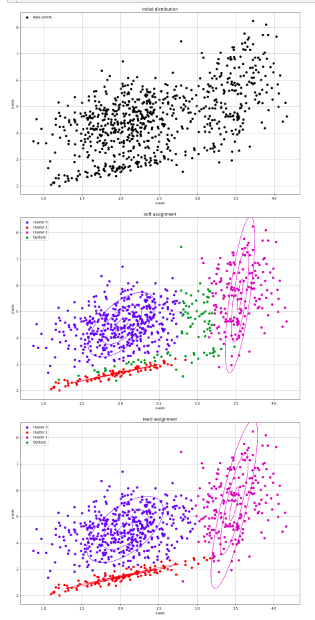

**Image is given only for dataset1, dataset2 the procedure is same so you should get the right plot.

## Dataset 1[35 points]

In [6]:
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data = data[1:, :]
    

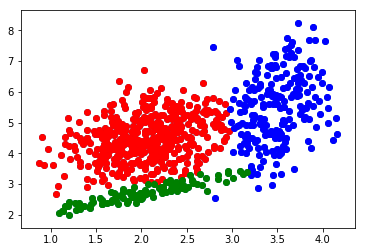

In [7]:
"""
def plotEllipsoids():
        #fucntion to plot ellipsoids
        X = data[1:, :] 
        # turn to dataframe 
        d = pd.DataFrame(X) 
        # plot the data 
        plt.scatter(d[0], d[1]) 
    return
"""
def algorithmEM():
    #function for EM algorithm
    #plot ellipsoids
    X = data[1:, :] 
    # turn to dataframe 
    d = pd.DataFrame(X) 
    # plot the data 
    plt.scatter(d[0], d[1])    
    gm = GaussianMixture(n_components = 3) 
    gm.fit(d) 

    labels = gm.predict(d) 
    d['labels']= labels
    d0 = d[d['labels']== 0] 
    d1 = d[d['labels']== 1] 
    d2 = d[d['labels']== 2] 

    plt.scatter(d0[0], d0[1], c ='r') 
    plt.scatter(d1[0], d1[1], c ='b') 
    plt.scatter(d2[0], d2[1], c ='g')
    return
 
if __name__ == '__main__':
    #plotEllipsoids()
    algorithmEM()

#### Explain the concept behind your ellipsoid plotting, like how you plotted it [5 points]

**Your explanation here**

## Dataset 2[10 points]

In [8]:
np.random.seed(150)
means = np.array([[1.1, 6.5],
                  [2.5, 4.7],
                  [3.0, 3.3]])
covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
               np.array([[0.35, 0.22], [0.22, 0.20]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [4, 1, 3]
factor = 100

data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
          np.random.multivariate_normal(means[i], covariances[i],
                                                size=factor * amplitudes[i])])
data = data[1:, :]

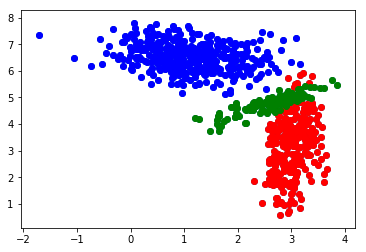

In [9]:
#### Call the function EM algorithm for dataset2
X = data[1:, :] 
# turn to dataframe 
d = pd.DataFrame(X) 
algorithmEM()